In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('drug200.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [ ]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [ ]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [ ]:
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [ ]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<ipython-input-87-17d85b203137>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df, palette="crest")


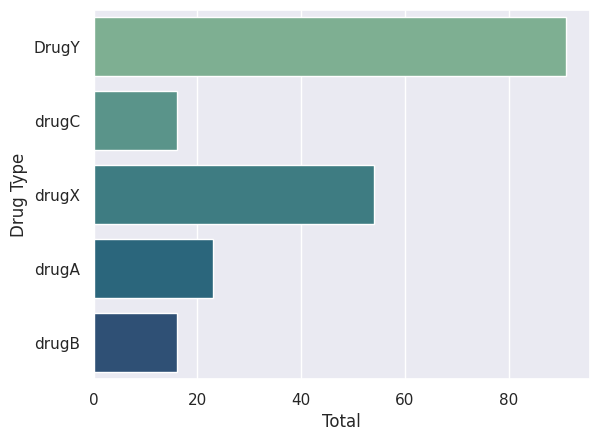

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="crest")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

<ipython-input-88-8ad7728f8d9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="crest")


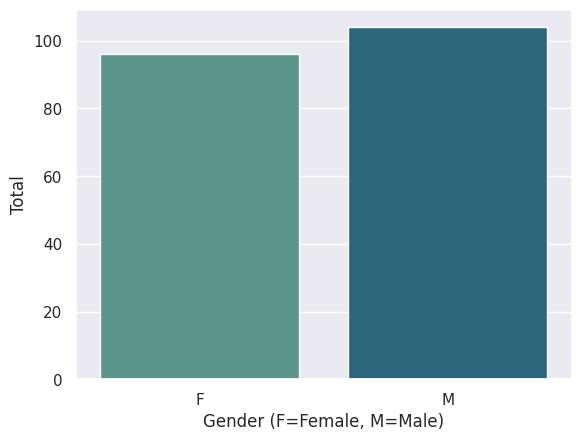

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="crest")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

<ipython-input-89-4cad95c4e78a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=df, palette="crest")


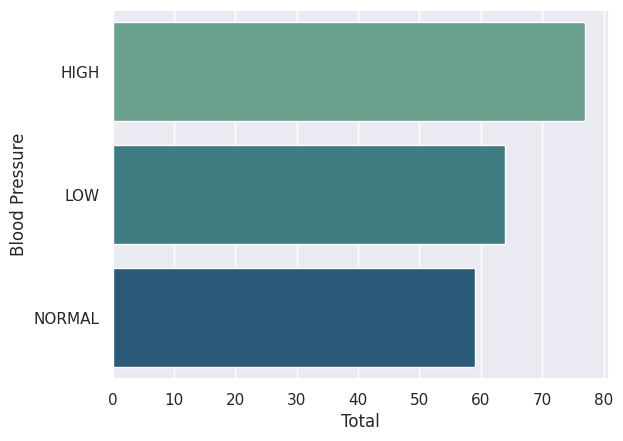

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

<ipython-input-90-540571bfd1d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=df, palette="crest")


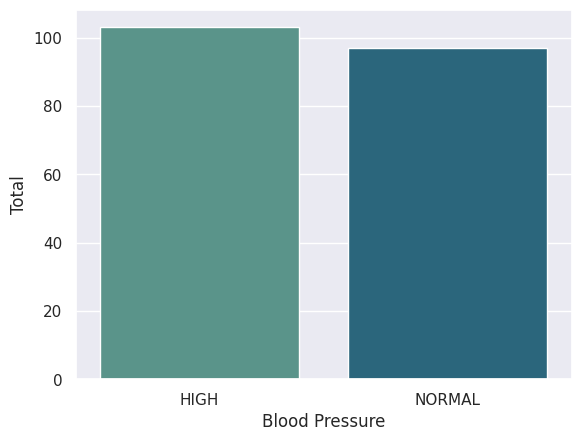

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="crest")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

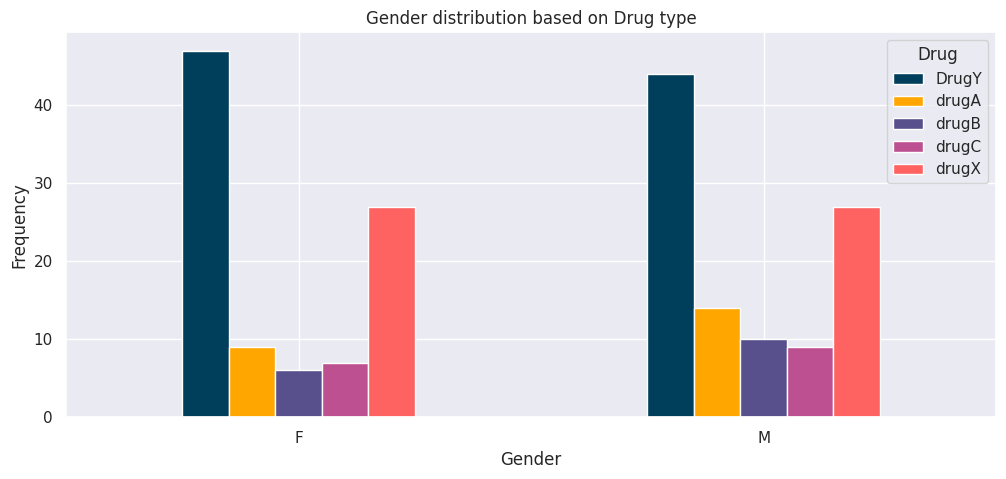

In [ ]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

In [ ]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df.drop(['Na_to_K'], axis = 1)

In [ ]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
X_train.head()

,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,32.922,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True
96,38.247,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
181,13.884,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False
19,25.974,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
153,14.642,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False


In [ ]:
X_test.head()

,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,7.298,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False
170,12.879,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False
107,20.013,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
98,35.639,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
177,19.011,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False


In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

<ipython-input-99-5bcbb24e3931>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=df, palette="crest")


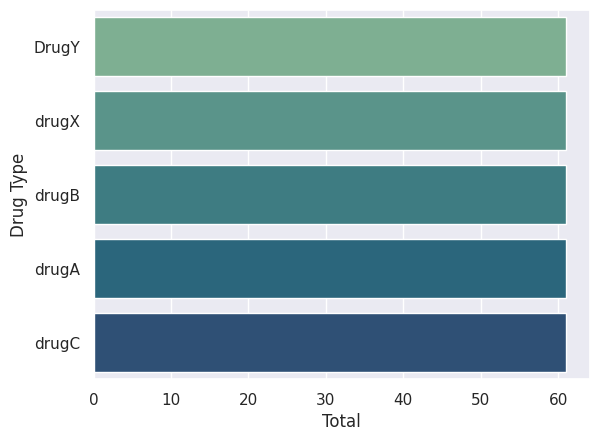

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="crest")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [ ]:
#@title Regresion logistica

LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        30
       drugA       0.83      1.00      0.91         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.99      0.98      0.98        60

[[29  1  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 98.33%


In [ ]:
#@title Arbol de decision
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20, max_depth=5, min_samples_leaf=5, min_samples_split=10)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('\nDecision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      0.60      0.75         5
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg       0.92      0.92      0.90        60
weighted avg       0.98      0.97      0.97        60

[[30  0  0  0  0]
 [ 0  3  2  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]

Decision Tree accuracy is: 96.67%
